In [1]:
from lale.lib.lale import ConcatFeatures as Concat
from lale.lib.lale import NoOp
from lale.lib.sklearn import KNeighborsClassifier as KNN
from lale.lib.sklearn import LogisticRegression as LR
from lale.lib.sklearn import MinMaxScaler as Scaler
from lale.lib.sklearn import Nystroem
from lale.lib.sklearn import PCA
from lale.helpers import to_graphviz

## Combinator-Style
| Symbol | Name | Description  | Sklearn feature |
| ------ | ---- | ------------ | --------------- |
| >>     | pipe | Feed to next | `make_pipeline` |
| &      | and  | Run both     | `make_union`, includes concat |
| &#x7c; | or   | Choose one   | (missing) |

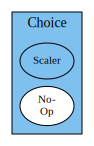

In [2]:
scl = Scaler | NoOp
to_graphviz(scl)

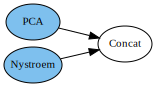

In [3]:
tfm = (PCA & Nystroem) >> Concat
to_graphviz(tfm)

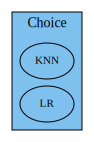

In [4]:
clf = KNN | LR
to_graphviz(clf)

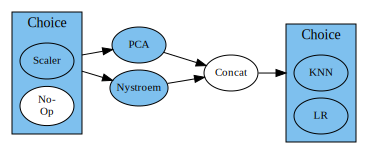

In [5]:
optimizable = scl >> tfm >> clf
to_graphviz(optimizable)

## Sklearn-Style

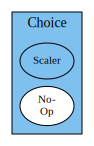

In [6]:
from lale.operators import make_choice, make_pipeline, make_union
scl = make_choice(Scaler, NoOp)
to_graphviz(scl)

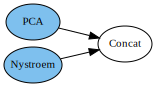

In [7]:
tfm = make_union(PCA, Nystroem)
to_graphviz(tfm)

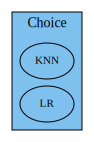

In [8]:
clf = make_choice(KNN, LR)
to_graphviz(clf)

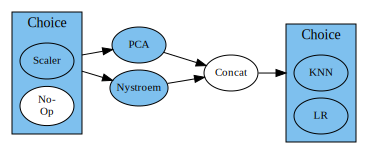

In [9]:
optimizable = make_pipeline(scl, tfm, clf)
to_graphviz(optimizable)

In [10]:
optimizable.to_json()

{'class': 'lale.operators.PlannedPipeline',
 'state': 'planned',
 'id': 'pipeline',
 'edges': [[0, 1], [0, 2], [1, 3], [2, 3], [3, 4]],
 'steps': [{'class': 'lale.operators.OperatorChoice',
   'state': 'planned',
   'operator': 'OperatorChoice',
   'id': 'choice_0',
   'steps': [{'class': 'lale.lib.sklearn.min_max_scaler.MinMaxScalerImpl',
     'state': 'planned',
     'operator': 'MinMaxScaler',
     'label': 'Scaler',
     'id': 'scaler',
     'documentation_url': 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html'},
    {'class': 'lale.lib.lale.no_op.NoOpImpl',
     'state': 'trained',
     'operator': 'NoOp',
     'label': 'NoOp',
     'id': 'no_op',
     'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.lale.no_op.html',
     'hyperparams': None,
     'is_frozen_trainable': True,
     'coefs': None,
     'is_frozen_trained': True}]},
  {'class': 'lale.lib.sklearn.pca.PCAImpl',
   'state': 'planned',
   'operator': 

## Nested

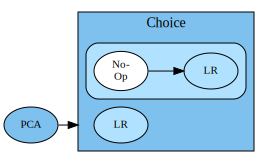

In [11]:
optimizable = PCA >> (LR(C=0.09) | NoOp >> LR(C=0.19))
to_graphviz(optimizable)

In [12]:
optimizable.to_json()

{'class': 'lale.operators.PlannedPipeline',
 'state': 'planned',
 'id': 'pipeline_0',
 'edges': [[0, 1]],
 'steps': [{'class': 'lale.lib.sklearn.pca.PCAImpl',
   'state': 'planned',
   'operator': 'PCA',
   'label': 'PCA',
   'id': 'pca',
   'documentation_url': 'https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html'},
  {'class': 'lale.operators.OperatorChoice',
   'state': 'planned',
   'operator': 'OperatorChoice',
   'id': 'choice',
   'steps': [{'class': 'lale.lib.sklearn.logistic_regression.LogisticRegressionImpl',
     'state': 'trainable',
     'operator': 'LogisticRegression',
     'label': 'LR',
     'id': 'lr_0',
     'documentation_url': 'http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html',
     'hyperparams': {'C': 0.09},
     'is_frozen_trainable': False},
    {'class': 'lale.operators.TrainablePipeline',
     'state': 'trainable',
     'id': 'pipeline_1',
     'edges': [[0, 1]],
     'steps': [{'class'

## Parametric

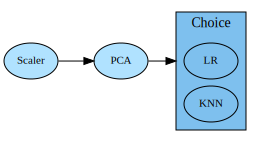

In [13]:
def my_pipeline(scale=False, n_components=10, clf=LR):
    scl = Scaler(feature_range=(0, 1)) if scale else NoOp
    pca = PCA(n_components=n_components)
    return scl >> pca >> clf

optimizable = my_pipeline(True, 15, LR | KNN)
to_graphviz(optimizable)

In [14]:
optimizable.to_json()

{'class': 'lale.operators.PlannedPipeline',
 'state': 'planned',
 'id': 'pipeline',
 'edges': [[0, 1], [1, 2]],
 'steps': [{'class': 'lale.lib.sklearn.min_max_scaler.MinMaxScalerImpl',
   'state': 'trainable',
   'operator': 'MinMaxScaler',
   'label': 'Scaler',
   'id': 'scaler',
   'documentation_url': 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html',
   'hyperparams': {'feature_range': (0, 1)},
   'is_frozen_trainable': True},
  {'class': 'lale.lib.sklearn.pca.PCAImpl',
   'state': 'trainable',
   'operator': 'PCA',
   'label': 'PCA',
   'id': 'pca',
   'documentation_url': 'https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html',
   'hyperparams': {'n_components': 15},
   'is_frozen_trainable': False},
  {'class': 'lale.operators.OperatorChoice',
   'state': 'planned',
   'operator': 'OperatorChoice',
   'id': 'choice',
   'steps': [{'class': 'lale.lib.sklearn.logistic_regression.LogisticRegressionImpl',
     'sta